$F_{loss}$ - относительные потери заряженных продуктов 
$P_{fus}$ -полная термоядерная мощность
$P_n$ - мощность в нейтронах ($0.8 P_{fus}$)
$P_{aux}$ - мощность тепловых потерь
$P_{rad}$ - мощность радиационных потерь (Учитывается только тормозное излучение)

$$
(1- f_{lost})(P_{fus} - P_{n}) + P_{aux} - P_{rad} - \frac{W_{th}V}{\Tau_{E}} = 0
$$  

$$
P_{fus} = n_Dn_T\langle \sigma v \rangle E_{fus}V
$$

$$
\langle \sigma v \rangle \approx  1.1 * 10^{-24} T_i^2
$$

$$
W_{th} = \frac{3}{2}nT
$$

In [34]:
import matplotlib.pyplot as plt
import scipy.integrate as si
import numpy as np
from tqdm import tqdm

In [35]:
F_loss = 0.05 
P_aux = 160000  
e_Z = 1.6021766208e-19
V_const = 1
C_br = 1.34e-36
S_gaz = 0.01
E_vz = 17.6e9
m = 200000
M = 20
N_a = 6e23



In [36]:
def Cial_Velocity(gas_vel, Start_mass, End_mass):
    return gas_vel*np.log(Start_mass/End_mass)
def Thermal_Energy(n,T):
    return 1.5*n*T
def Velocity(Velocity_gaz, Tau, n,T):
    V = Velocity_gaz * T * S_gaz
    W_th = Thermal_Energy( n,T)
    Sigma = T/4*n*e_Z
    Z_eff__2 = (e_Z**2*n)/n
    T_e = T*8.61732814974056E-04
    print(T_e)
    P_rad = 8.5*C_br*Z_eff__2*n**2*np.sqrt(T_e/511)*  V
    return np.divide(W_th, 0.2*Sigma*(1-F_loss)*Tau*E_vz) - (P_aux - P_rad)/(0.2*V*Sigma*n*E_vz*(1-F_loss))

2585.198444922168


C:\Users\virdg\AppData\Local\Temp\ipykernel_29808\1902642581.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.divide(W_th, 0.2*Sigma*(1-F_loss)*Tau*E_vz) - (P_aux - P_rad)/(0.2*V*Sigma*n*E_vz*(1-F_loss))


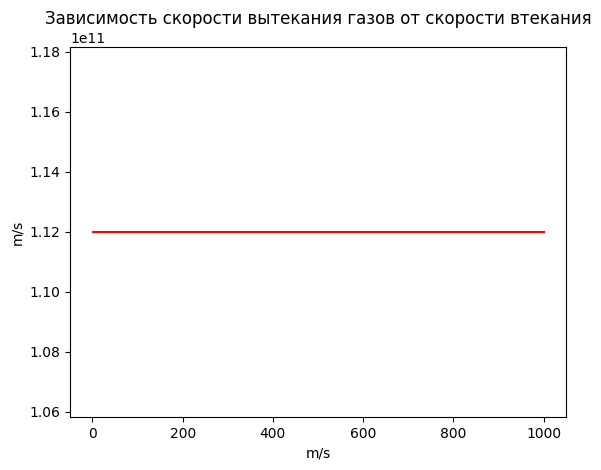

In [37]:
G_V = np.linspace(0, 1000, 1000)
My_vel = Velocity(G_V, 0.1, (m/M)*N_a, 3000000 )

plt.plot(G_V, My_vel, label='Output velocity by Input gaz velocity', color='red')
plt.title("Зависимость скорости вытекания газов от скорости втекания")
plt.xlabel("m/s")
plt.ylabel("m/s")
plt.show()

In [41]:
print(Cial_Velocity(1.12e11, 100000, 99800)/1000)

224224299.11537248
